In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import os
from graphviz import Source
import matplotlib.image as mpimg
from matplotlib import pyplot as plt

Decision Tree Result Accuracy: 84.39999999999999 %


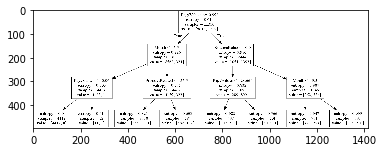

In [2]:
#使用Decision Tree分類器

# 讀取data_preprocessed.csv
data=pd.read_csv("data_preprocessed.csv")
data=data.drop(["Unnamed: 0"], axis=1)

# 將資料分為train_x,train_y,test_x,test_y
columns=list(data.columns)
columns.remove('Revenue')
train_x=data[columns]
train_y=data[['Revenue']]
test_x=train_x[-1000:]
test_y=train_y[-1000:]
train_x=train_x[:-1000]
train_y=train_y[:-1000]
test_x=test_x.reset_index()
test_y=test_y.reset_index()
test_x=test_x.drop(["index"], axis=1)
test_y=test_y.drop(["index"], axis=1)

#建立Decision Tree分類器
tree=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
tree.fit(train_x,train_y)

#預測測試資料
DecisionTreeResult=pd.DataFrame(tree.predict(test_x))
DecisionTreeResult.columns=['Revenue']

#此為測試資料的正確解答
OriginalResult=pd.DataFrame(test_y.values.reshape(-1))
OriginalResult.columns=['Revenue']

#計算有幾個數據正確
DecisionTreeResultCorrect=0
for i in range(OriginalResult.shape[0]):
    if DecisionTreeResult['Revenue'][i]==OriginalResult['Revenue'][i]:
        DecisionTreeResultCorrect=DecisionTreeResultCorrect+1
        
#計算準確度
DecisionTreeResultAcc=(DecisionTreeResultCorrect/OriginalResult.shape[0])*100
print('Decision Tree Result Accuracy: '+str(DecisionTreeResultAcc)+' %')

#輸出Decision Tree圖
export_graphviz(tree,out_file='tree.dot',feature_names=columns)

#將.dot檔轉換為png檔,並開啟
os.environ["PATH"] += os.pathsep + 'D://Graphviz2.38/bin/'
s=Source.from_file('tree.dot',format="png")
temp=os.system('dot -Tpng tree.dot -o tree.png')
img = mpimg.imread('tree.png')
plt.imshow(img)
plt.show()


In [3]:
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.01324909,
       0.        , 0.0525466 , 0.        , 0.82597418, 0.        ,
       0.10823013, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [4]:
print(columns)

['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
